## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Naive Bayes

In [20]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Import Iris.csv

In [21]:
df=pd.read_csv('Iris.csv')

In [22]:
# Check dimension of data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,151.000000,150.000000,150.000000,151.000000
mean,76.500000,5.843709,3.054000,3.758667,1.202649
std,44.022721,0.825314,0.433594,1.764420,0.762185
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


In [23]:
df_temp=pd.read_csv('Iris.csv')

Comments :----------------------------------------------------------------------------------------------------
From the above describe matrix we can confirm that , there is some missing values existed in data as count is varies in all the variables 

In [24]:
#Check data Type
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [26]:
# Check for NaN/Null values
df.isnull().values.any()

True

Comments:------------------------------------------------------------------------------
Replacing missing values wiht median values 

In [27]:
df = df.fillna(df.median()) 

Commenty:--------------------------------------------------------------------------------
Post the missing values imputation , checking if there is any null values still

In [28]:
df.isnull().values.any()

False

### Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

### Slice data set for Independent variables and dependent variables ( 1 Marks)
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [29]:
y=df['Species']

In [30]:
X=df.iloc[:,:5]

In [31]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [ ]:
#Check the dataset
print(y)
print(X)

### Find the distribution of target variable (Class) (1 Marks)

In [33]:
df.groupby(["Species"]).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,52,52,52,52,52


# As per the above data matrix , we can understand that , there is no much bias among the species variable data . Model can able 
#predict the data without showing bias towrads few variables. 

### Plot the distribution of target variable using histogram

In [34]:
import seaborn as sns

([array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([5., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 0., 0., 5.])],
 array([50. , 50.2, 50.4, 50.6, 50.8, 51. , 51.2, 51.4, 51.6, 51.8, 52. ]),
 <a list of 3 Lists of Patches objects>)

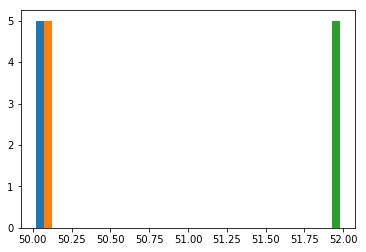

In [35]:
plt.hist(df.groupby(["Species"]).count())

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

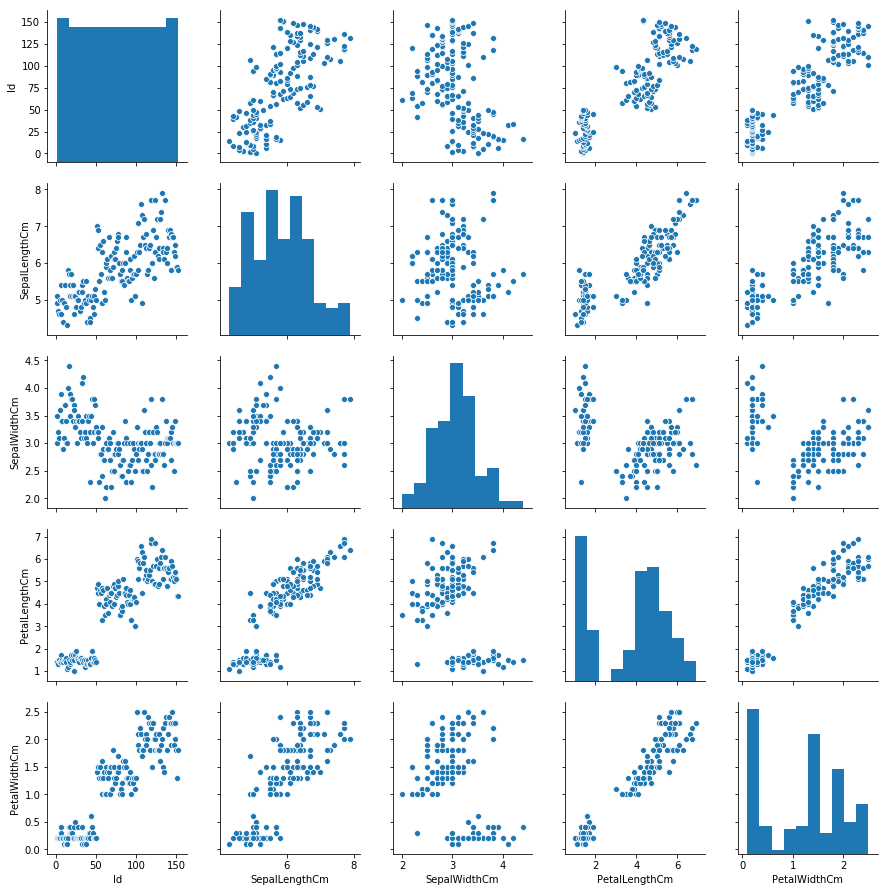

In [36]:
sns.pairplot(df)

Comments:- -------------------------------
Based on above plots we cand understand that , distribution between varialbes is linear in many cases as they grow towards right side However if we observe the scatter
plot of sepal width vs petallength , petal width and sepal width , seplalength vs sepalwidth  are not exactly distrubted linarly(skewed)

### Summary Statistics and explain insights for at least 2 variables (1 Marks)

In [37]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,152.000000,152.000000,152.000000,152.000000,152.000000
mean,76.500000,5.843421,3.053289,3.766447,1.203289
std,44.022721,0.822584,0.430757,1.754000,0.759698
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.750000,5.100000,2.800000,1.600000,0.300000
50%,76.500000,5.800000,3.000000,4.350000,1.300000
75%,114.250000,6.400000,3.300000,5.100000,1.800000
max,152.000000,7.900000,4.400000,6.900000,2.500000


Comments:--------------------------------------------------------------------------------------------------------
If we see the staistics now, We don't have any missiing values. Count of all variables is same 152. And as we don't require Id to 
be consider as variables for model , we can remove it. 

In [39]:
#Drop Id variable from data
df=df.drop(labels=['Id'], axis=1)

### Correlation among all variables and give your insights (1 Marks)

In [40]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [41]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000


Comments:-------------------------------------------------------------------------------------
High Correlation between variables can cause multicollinearity , From the above Matrix correlation value between petalWidth & 
petalLenght is 0.96 near to 1 

### Split data in Training and Validation in 80:20 (1 Marks)

In [42]:
### SPLITTING INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split

In [43]:
#X = df.iloc[:,0:4]
#y = df.iloc[:,4]
test_size = 0.20 # taking 80:20 training and test set
seed=1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### Do Feature Scaling ( 1 Marks)

In [44]:
# Use StandardScaler or similar methods
from sklearn.preprocessing import StandardScaler 
# Initialise the Scaler 
scaler = StandardScaler() 
# To scale data 
scaler.fit(X_train) 

C:\Users\Prasanna\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [45]:
X_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
19,20,5.1,3.8,1.5,0.3
113,114,5.7,2.5,5.0,2.0
103,104,6.3,2.9,5.6,1.8
77,78,6.7,3.0,5.0,1.7
145,146,6.7,3.0,5.2,2.3


### Train and Fit NaiveBayes Model(2 Marks)

In [46]:
#Fit the model
from sklearn.naive_bayes import GaussianNB

In [47]:
NB = GaussianNB()
GNB = NB.fit(X_train, y_train)

In [48]:
#Predict
y_predict = GNB.predict(X_test)

### Print Accuracy and Confusion Matrix and Conclude your findings(1 Marks)

In [49]:
# show Confusion Matrix
from sklearn import metrics

In [50]:
model_score = GNB.score(X_test, y_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[10  0  0]
 [ 0 13  0]
 [ 0  0  8]]


In [51]:
# show accuracy
print(model_score)

1.0


In [52]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [53]:
#Show precision and Recall metrics

In [54]:
metrics.classification_report(y_test, y_predict)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       1.00      1.00      1.00        13\n Iris-virginica       1.00      1.00      1.00         8\n\n      micro avg       1.00      1.00      1.00        31\n      macro avg       1.00      1.00      1.00        31\n   weighted avg       1.00      1.00      1.00        31\n'

## K-Nearest-Neighbors

# Reload your Iris.Csv and repeat it for KNN using following steps

In [ ]:
import warnings 
warnings.filterwarnings('ignore')

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Question 1 - Import Iris.csv

In [55]:
import pandas as pd

In [56]:
df=pd.read_csv('Iris.csv')

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [57]:
df = df.fillna(df.median()) 

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.apply(le.fit_transform)

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [59]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.705629,-0.394373,0.853251,0.880725,0.942753
SepalLengthCm,0.705629,1.000000,-0.115752,0.897280,0.816656,0.778151
SepalWidthCm,-0.394373,-0.115752,1.000000,-0.304523,-0.294568,-0.418901
PetalLengthCm,0.853251,0.897280,-0.304523,1.000000,0.943917,0.931134
PetalWidthCm,0.880725,0.816656,-0.294568,0.943917,1.000000,0.942812
Species,0.942753,0.778151,-0.418901,0.931134,0.942812,1.000000


All the features are not having correlation value in range of -0.1 to 0.1 with target vairable

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [60]:
df.cov()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1938.000000,252.288079,-74.168874,451.089404,247.215232,34.105960
SepalLengthCm,252.288079,65.960918,-4.016164,87.514509,42.290301,5.193534
SepalWidthCm,-74.168874,-4.016164,18.250566,-15.623083,-8.023832,-1.470634
PetalLengthCm,451.089404,87.514509,-15.623083,144.217454,72.277144,9.189177
PetalWidthCm,247.215232,42.290301,-8.023832,72.277144,40.655237,4.940136
Species,34.105960,5.193534,-1.470634,9.189177,4.940136,0.675322


As per the Covvariance matrix above, SepalWidthCm is having less variance i.e less than 0.1 . Hence we can drop that feature 


In [61]:
df=df.drop(labels=['SepalWidthCm'],axis=1)

## Question 6

*Plot the scatter matrix for all the variables.*

In [62]:
import seaborn as sns

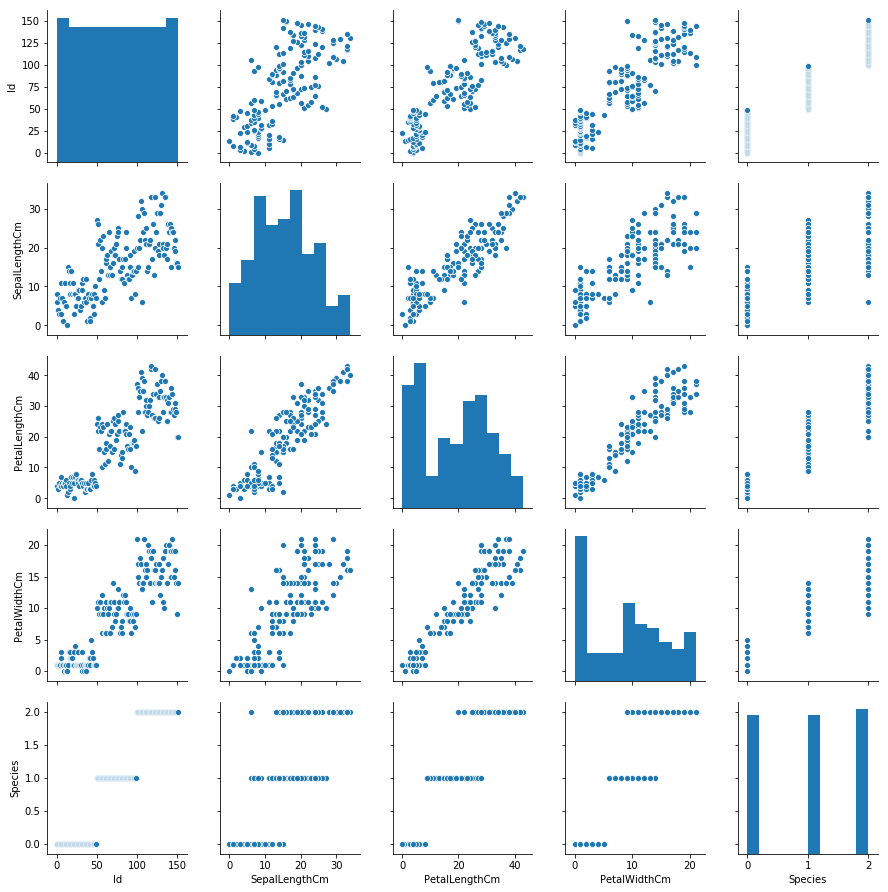

In [63]:
sns.pairplot(df)

Above shown scatter plots indicates distrubution is linearly scattered, and growing right side. 

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [64]:
X = df.drop("Species" , axis=1)

y = df.pop("Species")

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [132]:
from sklearn.neighbors import KNeighborsClassifier

In [133]:
NNH = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', 
                           metric = 'euclidean')

In [134]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [135]:
y_predict=NNH.predict(X_test)

In [145]:
y_predict

array([1, 0, 1, 2, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 2,
       1, 1, 1, 0, 0, 0, 1, 2, 0])

In [136]:
from sklearn.metrics import accuracy_score

In [137]:
accuracy_score=accuracy_score(y_test,y_predict)

In [138]:
accuracy_score

1.0

In [147]:
NNH_5 = KNeighborsClassifier(n_neighbors = 7, weights = 'uniform', 
                           metric = 'euclidean')
NNH_5.fit(X_train, y_train)
y_predict=NNH_5.predict(X_test)

In [129]:
y_predict=NNH.predict(X_test)

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [73]:
df['prob'] = pd.DataFrame(NNH.predict_proba(X_train))[1]

In [74]:
df['decile']=pd.qcut(df.prob.rank(method='first'), 10, labels=False)

In [75]:
df.head()

,Id,SepalLengthCm,PetalLengthCm,PetalWidthCm,prob,decile
0,0,8,4,1,0.0,0.0
1,1,6,4,1,0.0,0.0
2,2,4,3,1,0.0,0.0
3,3,3,5,1,1.0,6.0
4,4,7,4,1,0.0,0.0


In [76]:
df_temp['prob'] = pd.DataFrame(NNH.predict_proba(X_train))[1]

In [77]:
df_temp['decile']=pd.qcut(df_temp.prob.rank(method='first'), 10, labels=False)


In [ ]:
## Model Performance Measure
## Deciling
df_temp['decile']=pd.qcut(df_temp.prob.rank(method='first'), 10, labels=False)

## Rank Order Table and KS Statistics
def Response_Rate(X,y,Target):
    
    Rank=X.groupby('decile').apply(lambda x: pd.Series([
        np.min(x[y]),
        np.max(x[y]),
        np.mean(x[y]),
        np.size(x[y]),
        np.sum(x[Target]),
        np.size(x[Target][x[Target]==0]),
        ],
        index=(["min_prob","max_prob","avg_prob",
                "cnt","cnt_resp","cnt_non_resp"])
        )).reset_index()
    Rank=Rank.sort_values(by='decile',ascending=False)
    Rank["rrate"]=round(Rank["cnt_resp"]*100/Rank["cnt"],2)
    Rank["cum_resp"]=np.cumsum(Rank["cnt_resp"])
    Rank["cum_non_resp"]=np.cumsum(Rank["cnt_non_resp"])
    Rank["cum_resp_pct"]=round(Rank["cum_resp"]*100/np.sum(Rank["cnt_resp"]),2)
    Rank["cum_non_resp_pct"]=round(
            Rank["cum_non_resp"]*100/np.sum(Rank["cnt_non_resp"]),2)
    Rank["KS"] = round(Rank["cum_resp_pct"] - Rank["cum_non_resp_pct"],2)
    Rank
    return(Rank)


RRate = Response_Rate(df_temp,"prob","Species")
RRate

In [97]:
from sklearn.model_selection import GridSearchCV

k = np.arange(1,20,2)
knn = KNeighborsClassifier(algorithm = 'kd_tree')
parameters = {'n_neighbors' : k}
##GS = GridSearchCV(knn, parameters, scoring = my_auc, cv=10)
GS = GridSearchCV(knn, parameters, cv=10)

In [98]:
GS.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [99]:
GS.best_params_

{'n_neighbors': 1}

In [100]:
GS.best_score_

1.0

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

#Model has no claddification error for k values 1 to 19 (odd numbers) Hence there is no error as such